# Dogs and Cats sample data
- file 정리
- train image 는 10개로 부풀려 저장하기
총 1만장이 될것
- case 1 ) 원본 이미지 -> 부풀리기 - >150 X 150
- case 2 ) 원본 이미지 -> 150 X 150 - > 부풀리기




In [14]:
import cv2
import numpy as np
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-01-23 06:10:33--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   297MB/s    in 0.2s    

2022-01-23 06:10:33 (297 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
!unzip cats_and_dogs_filtered.zip > /dev/null

- 데이터 탐색

In [4]:
# 이미지를 센터링해서 이미지를 리턴하는 함수
IMAGE_SIZE = 150

def center_image(img, format='Image'):
    if format == 'Image':               # 포맷이 필로우 이미지 타입이면,
        h, w, _ = np.array(img).shape
    else:                           # 포맷이 이미지가 아니고 , 넘파이의 어레이라면,
        h, w = img.shape[:-1]        
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE

    new_img = np.array(img.resize((width,height)))

    diff = abs(width - height)//2
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]

    return Image.fromarray(final_img) if format == 'Image' else final_img
# 파이널 이미지의 타입은 넘파이의 어레이 였다.
# 뉴 이미지를 자른 것이므로 넘파이의 어레이. 그러므로 아래서 넘파이 어레이를 save하면 오류
# 넘파이는 세이브를 jiwon하지 않아. 

In [6]:
CENTER_DIR = 'cats_and_dogs_centered'
train_dir = f'{CENTER_DIR}/train'
validation_dir = f'{CENTER_DIR}/validation'
train_cats_dir = f'{CENTER_DIR}/train/cats'
train_dogs_dir = f'{CENTER_DIR}/train/dogs'
validation_cats_dir = f'{CENTER_DIR}/validation/cats'
validation_dogs_dir = f'{CENTER_DIR}/validation/dogs'

In [5]:
if not os.path.exists(CENTER_DIR):
    os.mkdir(CENTER_DIR)
for dir in [train_dir, validation_dir, train_cats_dir, train_dogs_dir, validation_cats_dir, validation_dogs_dir]:
    os.mkdir(dir)

In [8]:
old_train_cats_dir = 'cats_and_dogs_filtered/train/cats'
old_train_dogs_dir = 'cats_and_dogs_filtered/train/dogs'
old_validation_cats_dir = 'cats_and_dogs_filtered/validation/cats'
old_validation_dogs_dir = 'cats_and_dogs_filtered/validation/dogs'

- Case 1 ) 원본 이미지 => 부풀리기 150x150 

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=15,
    width_shift_range=0.1,
    shear_range=0.5,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    # vertical_flip=True,
    fill_mode='nearest'
)

In [10]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img(f'{old_train_cats_dir}/cat.475.jpg')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x.shape

(1, 287, 431, 3)

In [11]:
if not os.path.exists('preview'):
    os.mkdir('preview')

In [12]:
count = 0
for _ in train_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='pre'):
    count += 1
    if count >= 10:
        break

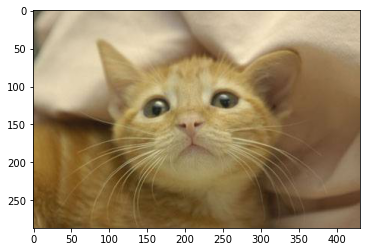

In [13]:
plt.imshow(img); # 원본데이터

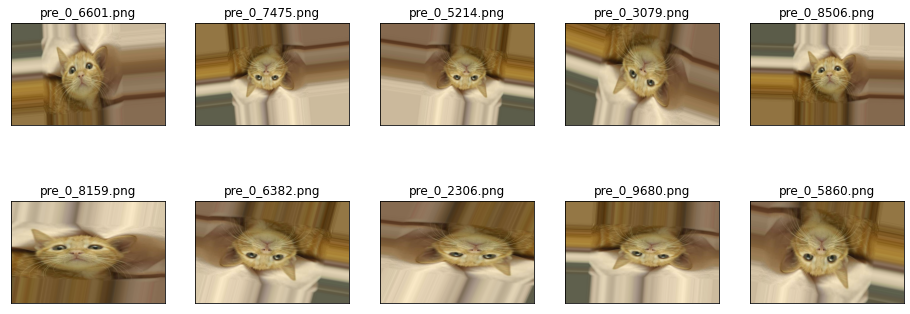

In [25]:
plt.figure(figsize=(16,6))
for i, fname in enumerate(glob('preview/*.png')):
    img = Image.open(fname)
    plt.subplot(2,5,i+1)
    plt.imshow(img), plt.title(fname.split('/')[1]), plt.xticks([]), plt.yticks([])
plt.show()

In [19]:
aug_train_cats_dir = 'augmented/train/cats'
aug_train_dogs_dir = 'augmented/train/dogs'
# aug_validation_cats_dir = 'augmented/validation/cats'
# aug_validation_dogs_dir = 'augmented/validation/dogs'
if not os.path.exists('augmented'):
    os.mkdir('augmented')
    os.mkdir('augmented/train')
    os.mkdir(aug_train_cats_dir)
    os.mkdir(aug_train_dogs_dir)

In [21]:
# !rm cats_and_dogs_filtered/train/cats/*.png

In [23]:
from tqdm.notebook import tqdm
for fname in tqdm(glob(f'{old_train_cats_dir}/*.jpg')):
    img = load_img(fname)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    pre = fname.split('.')[1]
    count = 0
    for _ in train_datagen.flow(x, batch_size=1, save_to_dir=aug_train_cats_dir, save_prefix=pre):
        count += 1
        if count >= 10:
            break

    # pre 에 컴마 있어야 되 없어야 돼?

  0%|          | 0/1000 [00:00<?, ?it/s]

In [26]:
for fname in tqdm(glob(f'{old_train_dogs_dir}/*.jpg')):
    img = load_img(fname)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    pre = fname.split('.')[1]
    count = 0
    for _ in train_datagen.flow(x, batch_size=1, save_to_dir=aug_train_dogs_dir, save_prefix=pre):
        count += 1
        if count >= 10:
            break

    # pre 에 컴마 있어야 되 없어야 돼?

  0%|          | 0/1000 [00:00<?, ?it/s]

In [29]:
len(os.listdir(aug_train_cats_dir)), len(os.listdir(aug_train_dogs_dir))

(6348, 6299)

In [31]:
cat_fnames = glob(f'{aug_train_cats_dir}/*png')
cat_fnames[:4]

['augmented/train/cats/pre_0_8374.png',
 'augmented/train/cats/pre_0_3351.png',
 'augmented/train/cats/pre_0_2000.png',
 'augmented/train/cats/pre_0_7053.png']

In [34]:
# cats_and_dogs.filtered -> image 축소/확대후 centering -> cats_and_dogs_centered 폴더로 보내기
from glob import glob
for src_dir in [aug_train_cats_dir, aug_train_dogs_dir, old_validation_cats_dir,old_validation_dogs_dir]:
    dst_dir = src_dir.split('/')[1:]          # cats_and_dogs_filtered 제거 후
    dst_dir = '/'.join([CENTER_DIR] + dst_dir)  # CENTER_DIR 밑에 오는 디렉토리 지정
    for fname in glob(f'{src_dir}/*'):
        dst_fname = fname.split('/')[-1]      # 예를 들어. cat.475.jpg
        src_img = Image.open(fname)           # 사이즈가 제각각인 이미지
        dst_img = center_image(src_img)       # 150 x 150 으로 centering 된 이미지(pillow로 변경)
        dst_img.save(f'{dst_dir}/{dst_fname}')   

In [35]:
# 파일 갯수 확인
len(os.listdir(train_cats_dir)), len(os.listdir(train_dogs_dir))

(6348, 6299)

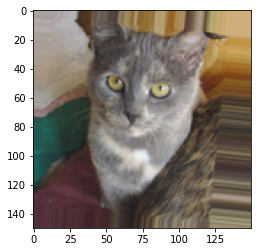

In [37]:
# 이미지 확인 
img = Image.open(f'{train_cats_dir}/pre_0_8374.png')
plt.imshow(img)

- Case 2 ) 원본 이미지 => 150 150 => 부풀리기

In [41]:
CENTER_DIR2 = 'case2_centered'
train_dir = f'{CENTER_DIR2}/train'
validation_dir = f'{CENTER_DIR2}/validation'
train_cats_dir = f'{CENTER_DIR2}/train/cats'
train_dogs_dir = f'{CENTER_DIR2}/train/dogs'
validation_cats_dir = f'{CENTER_DIR2}/validation/cats'
validation_dogs_dir = f'{CENTER_DIR2}/validation/dogs'

In [42]:
if not os.path.exists(CENTER_DIR2):
    os.mkdir(CENTER_DIR2)
for dir in [train_dir, validation_dir, train_cats_dir, train_dogs_dir, validation_cats_dir, validation_dogs_dir]:
    os.mkdir(dir)

In [43]:
aug_train_cats_dir = 'case2_augmented/train/cats'
aug_train_dogs_dir = 'case2_augmented/train/dogs'
if not os.path.exists('case2_augmented'):
    os.mkdir('case2_augmented')
    os.mkdir('case2_augmented/train')
    os.mkdir(aug_train_cats_dir)
    os.mkdir(aug_train_dogs_dir)

In [44]:
# cats_and_dogs.filtered -> image 축소/확대후 centering -> cats_and_dogs_centered 폴더로 보내기
for src_dir in [old_train_cats_dir, old_train_dogs_dir, old_validation_cats_dir,old_validation_dogs_dir]:
    dst_dir = src_dir.split('/')[1:]          # cats_and_dogs_filtered 제거 후
    dst_dir = '/'.join([CENTER_DIR2] + dst_dir)  # CENTER_DIR 밑에 오는 디렉토리 지정
    for fname in tqdm(glob(f'{src_dir}/*')):
        dst_fname = fname.split('/')[-1]      # 예를 들어. cat.475.jpg
        src_img = Image.open(fname)           # 사이즈가 제각각인 이미지
        dst_img = center_image(src_img)       # 150 x 150 으로 centering 된 이미지(pillow로 변경)
        dst_img.save(f'{dst_dir}/{dst_fname}')   

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [46]:
train_cats_dir, aug_train_cats_dir

('case2_centered/train/cats', 'case2_augmented/train/cats')

In [50]:
for fname in tqdm(glob(f'{train_cats_dir}/*.jpg')):
    img = load_img(fname)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    pre = fname.split('.')[1]
    count = 0
    for _ in train_datagen.flow(x, batch_size=1, save_to_dir=aug_train_cats_dir, save_prefix=pre):
        count += 1
        if count >= 10:
            break

  0%|          | 0/1000 [00:00<?, ?it/s]

In [51]:
for fname in tqdm(glob(f'{train_dogs_dir}/*.jpg')):
    img = load_img(fname)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    pre = fname.split('.')[1]
    count = 0
    for _ in train_datagen.flow(x, batch_size=1, save_to_dir=aug_train_dogs_dir, save_prefix=pre):
        count += 1
        if count >= 10:
            break

  0%|          | 0/1000 [00:00<?, ?it/s]

In [52]:
len(os.listdir(aug_train_cats_dir)), len(os.listdir(aug_train_dogs_dir))

(9996, 16227)

In [ ]:
plt.figure(figsize=(12,5))
cat_fnames = glob(f'{aug_train_cats_dir}/*')
dog_fnames = glob(f'{aug_train_dogs_dir}/*')
for i in range(5):
    img = Image.open(cat_fnames[i])
    plt.subplot(2,5,i+1)
    plt.imshow(img), plt.title(cat_fnames[i].split('/')[-1]), plt.xticks([]), plt.yticks([])
    img = Image.open(dog_fnames[i])
    plt.subplot(2,5,i+1+5)
    plt.imshow(img), plt.title(dog_fnames[i].split('/')[-1]), plt.xticks([]), plt.yticks([])
plt.show()